In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Importing the dataset
data = pd.read_csv('/content/drive/MyDrive/storm_dataset.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,storm,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,storm,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [ ]:
data.shape

(96453, 12)

In [ ]:
#preparing the dataset for training the model
data['Loud Cover'].value_counts()

0    96453
Name: Loud Cover, dtype: int64

In [ ]:
# Removing variable which wont have much impact on the prediction. value of loud cover is same for all rows, so it wont affect the prediction.
data.drop(['Formatted Date','Daily Summary','Loud Cover','Wind Bearing (degrees)'],axis=1,inplace=True)

In [ ]:
data

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,15.8263,1015.63
2,Mostly Cloudy,storm,9.377778,9.377778,0.89,3.9284,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,15.8263,1016.41
4,Mostly Cloudy,storm,8.755556,6.977778,0.83,11.0446,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,16.1000,1014.36
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,15.5526,1015.16
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,16.1000,1015.66
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,16.1000,1015.95


In [ ]:
data.shape

(96453, 8)

In [ ]:
#checking if any null values present in the dataset
data.isnull().sum()

Summary                       0
Precip Type                 337
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [ ]:
data['Precip Type'].value_counts()

rain     59192
storm    28098
snow      8826
Name: Precip Type, dtype: int64

In [ ]:
data['Precip Type'].fillna(method='ffill',inplace=True,axis=0)

In [ ]:
data['Precip Type'].value_counts()

rain     59336
storm    28291
snow      8826
Name: Precip Type, dtype: int64

In [ ]:
# Converting categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Precip Type']=le.fit_transform(data['Precip Type'])
data['Summary']=le.fit_transform(data['Summary'])

In [ ]:
data

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,19,0,9.472222,7.388889,0.89,14.1197,15.8263,1015.13
1,19,0,9.355556,7.227778,0.86,14.2646,15.8263,1015.63
2,17,2,9.377778,9.377778,0.89,3.9284,14.9569,1015.94
3,19,0,8.288889,5.944444,0.83,14.1036,15.8263,1016.41
4,17,2,8.755556,6.977778,0.83,11.0446,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,19,0,26.016667,26.016667,0.43,10.9963,16.1000,1014.36
96449,19,0,24.583333,24.583333,0.48,10.0947,15.5526,1015.16
96450,19,0,22.038889,22.038889,0.56,8.9838,16.1000,1015.66
96451,19,0,21.522222,21.522222,0.60,10.5294,16.1000,1015.95


In [ ]:
y=data.iloc[:,0] # Dependent Variable 

In [ ]:
x = data.iloc[:,1:]    #Independent variable

In [ ]:
x.corr()    # checking correlation to drop unnecessary variable

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
Precip Type,1.000000,-0.117876,-0.118233,0.039381,0.034552,0.011902,0.043358
Temperature (C),-0.117876,1.000000,0.992629,-0.632255,0.008957,0.392847,-0.005447
Apparent Temperature (C),-0.118233,0.992629,1.000000,-0.602571,-0.056650,0.381718,-0.000219
Humidity,0.039381,-0.632255,-0.602571,1.000000,-0.224951,-0.369173,0.005454
Wind Speed (km/h),0.034552,0.008957,-0.056650,-0.224951,1.000000,0.100749,-0.049263
Visibility (km),0.011902,0.392847,0.381718,-0.369173,0.100749,1.000000,0.059818
Pressure (millibars),0.043358,-0.005447,-0.000219,0.005454,-0.049263,0.059818,1.000000


In [ ]:
# Apparent Temperature and Temperax.drop('Apparent Temperature (C)',axis=1,inplace=True)ture are highly correlated (correlation almost equal to 1). So, we can drop one of them.
x.drop('Apparent Temperature (C)',axis=1,inplace=True)

In [ ]:
print(x)
x.shape

       Precip Type  Temperature (C)  Humidity  Wind Speed (km/h)  \
0                0         9.472222      0.89            14.1197   
1                0         9.355556      0.86            14.2646   
2                2         9.377778      0.89             3.9284   
3                0         8.288889      0.83            14.1036   
4                2         8.755556      0.83            11.0446   
...            ...              ...       ...                ...   
96448            0        26.016667      0.43            10.9963   
96449            0        24.583333      0.48            10.0947   
96450            0        22.038889      0.56             8.9838   
96451            0        21.522222      0.60            10.5294   
96452            0        20.438889      0.61             5.8765   

       Visibility (km)  Pressure (millibars)  
0              15.8263               1015.13  
1              15.8263               1015.63  
2              14.9569               1015.

(96453, 6)

In [ ]:
# Splitting the dataset into train data and test data
# Train dataset is 70% of and Test dataset is 30% of original dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=50)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(67517, 6)
(28936, 6)


In [ ]:
#alogorithm1-K Nearest Neighbor Algorithm
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_predicted_knn = model_knn.predict(x_test)
score = model_knn.score(x_test, y_test)
percentage = score * 100
print(f'Accuracy: {round(percentage,2)}%')

Accuracy: 72.61%


Text(33.0, 0.5, 'Truth')

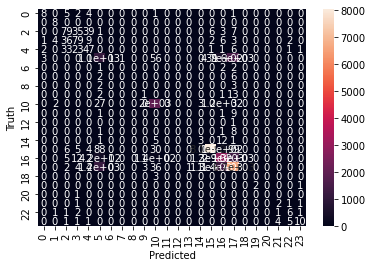

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_predicted_knn)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#algorithm2-navie bayes algorithm
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_predicted_gnb = gnb.predict(x_test)
score = gnb.score(x_test, y_test)
percentage = score * 100
print(f'Accuracy: {round(percentage,2)}%')

Accuracy: 62.42%


Text(33.0, 0.5, 'Truth')

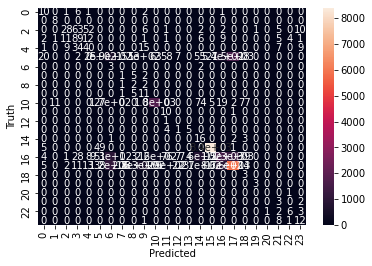

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_predicted_gnb)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

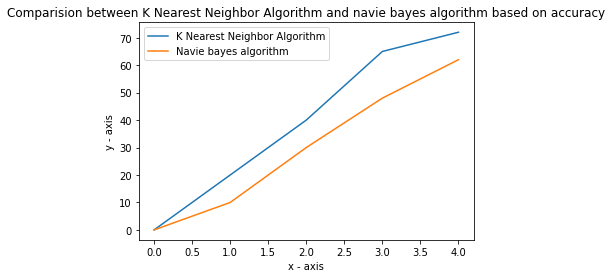

In [ ]:
#comparision graph 
import matplotlib.pyplot as plt
# line 1 points
x1 = [0,20,40,65,72]
# plotting the line 1 points 
plt.plot(x1, label = "K Nearest Neighbor Algorithm")
# line 2 points
x2 = [0,10,30,48,62]
# plotting the line 2 points 
plt.plot(x2, label = "Navie bayes algorithm")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Comparision between K Nearest Neighbor Algorithm and navie bayes algorithm based on accuracy')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()